# Time-dependent-Models

To define a model to a system is to define how the system change and behaves depending on independent variables. Usually assumes some simplifications and focus on the main values and variables that drive the system change, at least at the level it is pretend to represent and modeling the system itself.

We already seen the Ising Model for ferromagnetism, which models a ferromagnetic material by spin-spin iteration on close grid points. This is a model that uses non deterministic processes and a discrete representation of the system.

There are many different ways to model a system of interest, others could be a decision tree, i.e. a set of decisions or changes on the system considering some actual system characteristics, or another example using differential equations.

A differential equation is an equation that relates at least one derivative (of first order or higher) of a given quantity and that quantity itself, at least the more interesting ones.

As examples, a body falling under Earth’s gravity with relevant air resistance:

$$F = mg - D \Leftrightarrow m \frac{dv}{dt} = mg - bv^{2}$$

$$b = \frac{1}{2} \rho_{air}A C_D$$

Or a body under a central gravitational field:

$$\vec{F}_G = -G \frac{mM}{r^{2}}\hat{r} \Leftrightarrow m\frac{d^{2}\vec{r}}{dt^{2}} = -G \frac{mM}{r^{2}}\hat{r}$$

$$\frac{d^{2}\vec{r}}{dt^{2}} = -G \frac{M}{r^{2}}\hat{r} \Leftrightarrow \ddot{\vec{r}} = -G \frac{M}{r^{2}}\hat{r} $$

Or even a model of prey-predator species populations:

\begin{equation}
    \begin{cases}
        \dot{x} = ax - bxy \\
        \dot{y} = cy + dxy
    \end{cases}
\end{equation}

Some differential equations have known analytical solutions, for others there are no known solutions. And even when the analytical solutions can be found if the model consists in a very large differential equations system it can be practically impossible to find the system solutions.

For those cases we can resort to numerical methods to obtain information or running simulations using the models.

## Euler method

The Euler method uses an approximation to the derivates with very small steps on the independent variable. This is for all effects a linear approximation to the solution points between two consecutive steps.

For the example of a falling body in Earth’s gravity and atmosphere, we had:

$$\dot{v} = g - \frac{b}{m}v^{2} $$

Using the Euler method we can approximate to:

$$ \frac{\Delta v}{\Delta t} \approx g -\frac{b}{m}v^{2} $$

$$v_{i+1} = g\Delta t - \frac{b}{m} v_{i}^{2} \Delta t + v_i $$

$\Delta t$ it is a metaparameter of the Euler method.

What happens if it is too big?

What happens if it is too small?

Let's implement the numerical solution. Before that, what would we expect to obtain if the model and our implementation works?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def eulerFalling(v, dt, m = 1, b = 1):
    '''Computes the new velocity from previous velocity and delta t
    v: previous velocity
    dt: delta t
    return: new velocity value'''
    g = 9.8

    return g*dt - b/m * v**2 * dt + v

In [ ]:
def fallingBody(v0, dt, ttotal, m = 1, b = 1):
    '''Computes the velocity values for a falling body considering air resistance
    v0: initial velocity
    dt: delta t to use in the Euler method
    ttotal: total time of the simulation
    return: A numpy array with velocity and time values after each Euler method step'''

    size = int(ttotal / dt + 1) #Number of steps to take plus one to have the initial value

    out = np.zeros((size, 2), dtype=float) #Output numpy array
    out[0] = [0, v0]

    v = v0
    for i in range(1, size):
        v = eulerFalling(v, dt, m, b)
        out[i] = [i * dt, v]

    return out

In [ ]:
result = fallingBody(0., .0001, 2)

In [ ]:
fig, ax = plt.subplots()
ax.plot(result[:, 0], result[:, 1])
ax.set_xlabel('t/s')
ax.set_ylabel('v/$ms^{-1}$')
pass

We can now apply the Euler method for a skydiver in a bird like position and a vertical aligned one. Assuming the values:

$$ v0 = 0 \mathrm{ms^{-1}}, m = 80\mathrm{kg}$$

$$ b_h \approx 0.32 \mathrm{kg m^{-1}}, b_v \approx 0.032 \mathrm{kg m^{-1}} $$

In [ ]:
m = 80
bh = 0.32
bv = 0.032
sk_h = fallingBody(0., 1., 60, m, bh)
sk_v = fallingBody(0., 1., 60, m, bv)

In [ ]:
fig, ax = plt.subplots()
ax.plot(sk_h[:, 0], sk_h[:, 1], label = 'Horizontal')
ax.plot(sk_v[:, 0], sk_v[:, 1], label = 'vertical')
ax.set_xlabel('t/s')
ax.set_ylabel('v/$ms^{-1}$')
ax.set_title('Skydiving velocities')
ax.legend()
pass

## With higher order derivatives

How to use the Euler method when there are higher order derivatives? For example a body in a central gravity field

$$ a = -G \frac{M}{r^2}$$
$$ v_{i+1} = v_i + a\times \Delta t$$
$$ r_{i+1} = r_i + v_i \times \Delta t$$

Since all quantities are vectors, except time and mass, and considering a planar orbit we can write:

$$ a_{x_{i}} \hat{x} + a_{y_{i}} \hat{y} = -G \frac{M}{x_i^2+y_i^2}\left(\frac{x_i}{\sqrt{x_i^2+y_i^2}}\hat{x} + \frac{y_i}{\sqrt{x_i^2+y_i^2}}\hat{y}\right)$$

$$ a_{x_i} \hat{x} + a_{y_i} \hat{y} = -G \frac{M}{\left(x_i^2+y_i^2\right)^{3/2}}\left(x_i\hat{x} + y_i\hat{y}\right)$$

$$v_{x_{i+1}}\hat{x}+v_{y_{i+1}}\hat{y} = \left(v_{x_i} + a_{x_i} \Delta t\right)\hat{x} + \left(v_{y_i} + a_{y_i} \Delta t\right)\hat{y}$$

$$x_{i+1}\hat{x} + y_{i+1}\hat{y} = \left(x_i + v_{x_i} \Delta t\right)\hat{x} + \left(y_i + v_{y_i} \Delta t\right)\hat{y}$$

Let’s consider an artificial satellite around Erath with a perfect circular orbit 300 km above the Earth’s surface

$$ G = 6.67 \times 10^{-11} \mathrm{m^3kg^{-1}s^{-2}} \quad M_{Earth} = 5.97 \times 10^{24} \mathrm{kg} \quad R_{Earth} = 6.38 \times 10^{6} \mathrm{m} $$

The orbital distance from the Earth's center is $r = R_{Earth} + h = 6.68 \times 10^6 \mathrm{m}$

The tangential velocity to ensure a circular orbit is obtained through the movement relations for a circular uniform movement.

$$ a_c = \frac{v^2}{r} \Leftrightarrow v = \sqrt{G\frac{M}{r^2}r} = \sqrt{GM/r} $$

$$ v = 7720.79 \mathrm{ms^{-1}} $$

The orbital period is:

$$ T = 2\pi r/\sqrt{GM/r} = 2\pi r^{3/2} / \sqrt{GM} = 5436 \mathrm{s} $$

Implementing a Euler method for the orbital model:

In [ ]:
def orbitEuler(r, v, dt):
    '''Computes a Euler method step in a orbit around the Earth
    r: a numpy array with vector with the positions in x and y of previous step
    v: a numpy array with vector with the velocities in x and y of previous step
    dt: The time step being used
    return: The new r and v vectors as numpy arrays'''

    G = 6.67 * 10**-11
    M = 5.97 * 10**24

    a = -G * M / ((r**2).sum())**(3/2) * r
    r = r + v * dt
    v = v + a * dt

    return r, v

In [ ]:
def orbitEarth(r0, v0, dt, ttotal):
    '''Runs a simulation on a body orbiting Earth
    r0: numpy array with initial position vector
    v0: numpy array with initial velocity vector
    dt: time step to be used in the model
    ttotal: the total time of simulated orbit time
    return: a array with times in seconds, positions in m and velocities in ms^-1'''

    size = int(ttotal / dt) + 1 #The size of the arrays to store the data

    t = np.zeros(size) #time array
    r = np.zeros((size,2)) #position array
    v = np.zeros((size,2)) #velocity array

    r[0] = r0
    v[0] = v0

    for i in range(1, size):
        r[i], v[i] = orbitEuler(r[i - 1], v[i - 1], dt)
        t[i] = t[i - 1] + dt

    return t, r, v

In [ ]:
G = 6.67 * 10**-11
M = 5.97 * 10**24
Re = 6.38* 10 ** 6
h = 300 * 10 **3
ro = Re + h
v0 = np.sqrt(G*M/ro)
r0 = np.array([ro, 0])
v0 = np.array([0, v0])

In [ ]:
t, r, v = orbitEarth(r0, v0, .01, 12000)

In [ ]:
fig, ax = plt.subplots()
ax.plot(r[:, 0], r[:, 1])
ax.set_xlabel('x/m')
ax.set_ylabel('y/m')
ax.axis('equal')
ax.set_title('satellite around Erath')
pass

## 

## Euler-Cromer method

The Euler method usually needs very small time steps to be stable. There is a semi-implicit, we will see later on what the implicit methods are, Euler method also known as Euler-Cromer method.

The only difference to the Euler method is that for computation of the new position it is used the new velocity value, i.e:

$$ a = -G \frac{M}{r^2}$$
$$ v_{i+1} = v_i + a\times \Delta t$$
$$ r_{i+1} = r_i + v_{i+1} \times \Delta t$$

In [ ]:
def orbitEulerCromer(r, v, dt):
    '''Computes a Euler method step in a orbit around the Earth
    r: a numpy array with vector with the positions in x and y of previous step
    v: a numpy array with vector with the velocities in x and y of previous step
    dt: The time step being used
    return: The new r and v vectors as numpy arrays'''

    G = 6.67 * 10**-11
    M = 5.97 * 10**24

    a = -G * M / ((r**2).sum())**(3/2) * r

    v = v + a * dt
    r = r + v * dt
    

    return r, v

In [ ]:
def orbitEarthEC(r0, v0, dt, ttotal):
    '''Runs a simulation on a body orbiting Earth
    r0: numpy array with initial position vector
    v0: numpy array with initial velocity vector
    dt: time step to be used in the model
    ttotal: the total time of simulated orbit time
    return: a array with times in seconds, positions in m and velocities in ms^-1'''

    size = int(ttotal / dt) + 1 #The size of the arrays to store the data

    t = np.zeros(size) #time array
    r = np.zeros((size,2)) #position array
    v = np.zeros((size,2)) #velocity array

    r[0] = r0
    v[0] = v0

    for i in range(1, size):
        r[i], v[i] = orbitEulerCromer(r[i - 1], v[i - 1], dt)
        t[i] = t[i - 1] + dt

    return t, r, v

In [ ]:
t, r, v = orbitEarthEC(r0, v0, .01, 12000)

In [ ]:
fig, ax = plt.subplots()
ax.plot(r[:, 0], r[:, 1])
ax.set_xlabel('x/m')
ax.set_ylabel('y/m')
ax.axis('equal')
ax.set_title('satellite around Erath')
pass

## Order of the algorithm

Both Euler and the Euler-Cromer methods are first order methods. Being first order methods means that to improve accuracy by one order we need to reduce the time step also in one order of magnitude.

Let’s test with Euler method for the falling body problem. The exact solution is:

$$ v(t) = v_{term} \tanh \left(\frac{gt}{v_{term}} + C_0\right) $$

With $v_{term} = \sqrt{mg/b}$ and $C_0 = 0$ for $v_0 = 0 \mathrm{ms^{-1}}$

Testing the Euler method with different time steps it is possible to observe that the method is stable for the conditions simulated with a time step 1 s. For 10 s the model is not stable.

So we will obtain the maximum error for the simulation with lower b varying the time step from 1 s to 0.0001 seconds.

In [13]:
times = np.array([10 ** -i for i in range(7)])
max_err = np.zeros(len(times))

In [14]:
def fallFunction(m, b, t):
    '''Computes the velocity for the corresponding times of a falling body under Earth gravatity
    and air resistance, assuming a starting velocity of 0 m/s
    m: the body mass in kg
    b: air resistance factor in kg/m
    t: numpy array with times in seconds
    return: numpy array with velocities for each value of time in t'''

    g = 9.8 #Earth gravity acceleration in m/s²

    vterm = np.sqrt(g * m / b) #Terminal velocity in m/s

    v = vterm * np.tanh(g * t / vterm)

    return v

In [15]:
for i, t in enumerate(times):
    out = fallingBody(0., t, 60, m, bv)
    v = fallFunction(m, bv, out[:, 0])
    max_err[i] = np.abs(v - out[:, 1]).max()

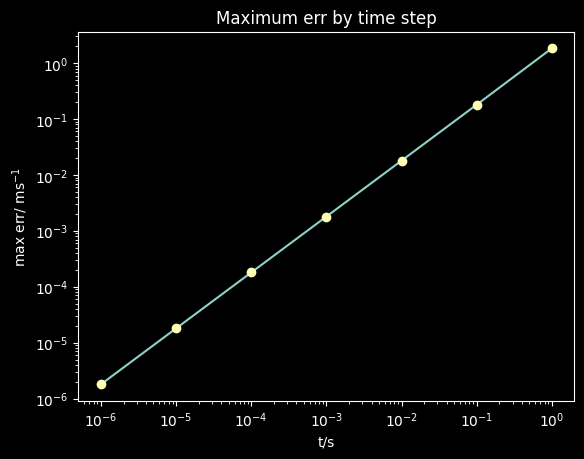

In [16]:
fig_o, ax_o = plt.subplots()
ax_o.loglog(times, max_err)
ax_o.loglog(times, max_err, 'o', label = 'Euler')
ax_o.set_xlabel('t/s')
ax_o.set_ylabel(r'max err/ $\mathrm{ms^{-1}}$')
ax_o.set_title('Maximum err by time step')
pass

## Higher order methods

A second order method is the 2nd order Runge-Kutta Method (RK2). It is a modification of the Euler method already seen, and first computes the $\Delta y$, with y as dependent variable, like the Euler method.

But afterwards uses that value to compute the $\Delta y$ assuming a middle value from the actual point and what Euler method would give as next value.

This method has twice the calculation of the slope to compute a new point. In the cases we seen so far this computation is very computationally non intensive, but in many real applications it can be computationally very intensive. The method is:

$$ a = \Delta t f(y_i, t_i) $$
$$ b = \Delta t f(y_i + a / 2, t_i + \Delta t / 2) $$
$$ y_{i+1} = y_i + b $$

Applied to the falling body, it gives:

$$ a = \Delta t \left( g - \frac{b_d}{m} v^2_i \right) $$
$$ b = \Delta t \left( g - \frac{b_d}{m} \left( v_i + \frac{a}{2} \right)^2 \right) $$
$$ v_{i+1} = v_i + b $$

Implementing it and testing for the same values used with the Euler method:

In [ ]:
def rk2Falling(v, dt, m = 1, b = 1):
    '''Computes the new velocity from previous velocity and delta t
    v: previous velocity
    dt: delta t
    return: new velocity value'''
    g = 9.8

    a = (g -b * v** 2 / m) * dt
    b = (g - b * (v + a / 2)**2 / m) * dt

    return v + b

In [ ]:
def fallingBodyrk2(v0, dt, ttotal, m = 1, b = 1):
    '''Computes the velocity values for a falling body considering air resistance
    v0: initial velocity
    dt: delta t to use in the Euler method
    ttotal: total time of the simulation
    return: A numpy array with velocity and time values after each Euler method step'''

    size = int(ttotal / dt + 1) #Number of steps to take plus one to have the initial value

    out = np.zeros((size, 2), dtype=float) #Output numpy array
    out[0] = [0, v0]

    v = v0
    for i in range(1, size):
        v = rk2Falling(v, dt, m, b)
        out[i] = [i * dt, v]

    return out

In [ ]:
sk_h = fallingBodyrk2(0., 1., 60, m, bh)
sk_v = fallingBodyrk2(0., 1., 60, m, bv)

In [ ]:
fig, ax = plt.subplots()
ax.plot(sk_h[:, 0], sk_h[:, 1], label = 'Horizontal')
ax.plot(sk_v[:, 0], sk_v[:, 1], label = 'vertical')
ax.set_xlabel('t/s')
ax.set_ylabel('v/$ms^{-1}$')
ax.set_title('Skydiving velocities')
ax.legend()
pass

In [ ]:
for i, t in enumerate(times):
    out = fallingBodyrk2(0., t, 60, m, bv)
    v = fallFunction(m, bv, out[:, 0])
    max_err[i] = np.abs(v - out[:, 1]).max()

In [ ]:
ax_o.loglog(times, max_err)
ax_o.loglog(times, max_err, '^', label = 'RK2')
ax_o.set_xlabel('t/s')
ax_o.set_ylabel(r'max err/ $\mathrm{ms^{-1}}$')
ax_o.set_title('Maximum err by time step')
pass

In [ ]:
fig_o

There are other high order methods, like the 4th Runge-Kutta method (RK4), which consists in:

$$ a = \Delta t f(y_i, t_i) $$
$$ b = \Delta t f(y_i + a / 2, t_i + \Delta t / 2) $$
$$ c = \Delta t f(y_i + b / 2, t_i + \Delta t / 2) $$
$$ d = \Delta t f(y_i + c, t_i + \Delta t)$$
$$ y_{i+1} = y_i + \frac{1}{6} (a + 2b + 2c + d) $$

For the falling body model it gives:

$$ a = \Delta t \left( g - \frac{b_d}{m} v^2_i \right) $$
$$ b = \Delta t \left( g - \frac{b_d}{m} \left( v_i + \frac{a}{2} \right)^2 \right) $$
$$ c = \Delta t \left( g - \frac{b_d}{m} \left( v_i + \frac{b}{2} \right)^2 \right) $$
$$ d = \Delta t \left( g - \frac{b_d}{m} \left( v_i + c \right)^2 \right) $$
$$ v_{i+1} = v_i + \frac{1}{6}\left( a + 2b + 2c + d\right) $$

In [ ]:
def rk4Falling(v, dt, m = 1, bd = 1):
    '''Computes the new velocity from previous velocity and delta t
    v: previous velocity
    dt: delta t
    return: new velocity value'''
    g = 9.8

    a = (g -bd * v** 2 / m) * dt
    b = (g - bd * (v + a / 2)**2 / m) * dt
    c = (g - bd * (v + b / 2)**2 / m) * dt
    d = (g - bd * (v + c)**2 / m) * dt

    return v + (a + 2 * b + 2 * c + d) / 6

In [ ]:
def fallingBodyrk4(v0, dt, ttotal, m = 1, b = 1):
    '''Computes the velocity values for a falling body considering air resistance
    v0: initial velocity
    dt: delta t to use in the Euler method
    ttotal: total time of the simulation
    return: A numpy array with velocity and time values after each Euler method step'''

    size = int(ttotal / dt + 1) #Number of steps to take plus one to have the initial value

    out = np.zeros((size, 2), dtype=float) #Output numpy array
    out[0] = [0, v0]

    v = v0
    for i in range(1, size):
        v = rk4Falling(v, dt, m, b)
        out[i] = [i * dt, v]

    return out

In [ ]:
sk_h = fallingBodyrk4(0., 1., 60, m, bh)
sk_v = fallingBodyrk4(0., 1., 60, m, bv)

In [ ]:
fig, ax = plt.subplots()
ax.plot(sk_h[:, 0], sk_h[:, 1], label = 'Horizontal')
ax.plot(sk_v[:, 0], sk_v[:, 1], label = 'vertical')
ax.set_xlabel('t/s')
ax.set_ylabel('v/$ms^{-1}$')
ax.set_title('Skydiving velocities')
ax.legend()
pass

In [ ]:
for i, t in enumerate(times):
    out = fallingBodyrk4(0., t, 60, m, bv)
    v = fallFunction(m, bv, out[:, 0])
    max_err[i] = np.abs(v - out[:, 1]).max()

In [ ]:
ax_o.loglog(times, max_err)
ax_o.loglog(times, max_err, '^', label = 'RK4')
ax_o.set_xlabel('t/s')
ax_o.set_ylabel(r'max err/ $\mathrm{ms^{-1}}$')
ax_o.set_title('Maximum err by time step')
ax_o.legend()
pass

In [ ]:
fig_o

## More than one dependent variable

When we have more than one dependent variable we have a system of equations.

In general we can consider the methods to have the base of:

$$\frac{dy_i}{dt} = f(y_i, t)$$

<strong>Careful, here the index i refers to the ith variable</strong>

When applying a discrete method, it becomes:

$$y_i^{n+1} = y_i^n + f(y_i, t) \Delta t$$ 

For more variables we can make:

\begin{equation}
    \begin{cases}
        y_1^{n+1} &amp;= y_1^n + f_1(y_1^n, ..., y_i^n, t) \Delta t \\
        y_2^{n+1} &amp;= y_2^n + f_2(y_1^n, ..., y_i^n, t) \Delta t \\
        &amp;\vdots \\
        y_i^{n+1} &amp;= y_i^n + f_i(y_1^n, ..., y_i^n, t) \Delta t \\
    \end{cases}
\end{equation}

Using the example of prey-predator population model view earlier, we can think in a population of rabbits and foxes.

\begin{equation}
    \begin{cases}
        \dot{r} = ar - brf \\
        \dot{f} = -mf + cbrf
    \end{cases}
\end{equation}

With r the number of rabbits, f the number of foxes. a, b, c and m are different factors, a the rate at which the rabbits population increases if there weren’t foxes, b the rate at which total possible encounters between prey and predators would lead to a diminishing of rabbits numbers. c is the somewhat the opposite of b, the rate at which those encounters would increase the foxes population. Finally m is the death rate of the foxes if there would not be any rabbits.

We can use a Euler method, or others, to perform simulations using this model.

In [ ]:
def rabbitFoxesEuler(r, f, dt):
    '''Makes a Euler method step on rabbits foxes population model.
    r: rabbits population
    f: foxes population
    dt: delta t
    return: the new population of rabbits and foxes'''

    a = 2.0 #1/month
    b = .01 # 1/(fox month)
    c = 0.1 # foxes / rabbits
    m = 1.0 # 1/month

    #What should be happening if r or f from previous step is 0?
    r_f = r + (a * r - b * r * f) * dt
    f_f = f + (-m * f + c * b * r * f) * dt


    return r_f, f_f

In [ ]:
def rabbitfoxes(r0, f0, dt, ttotal):
    '''Simulates the population of rabbits and foxes
    r0: initial number of rabbits
    f0: initial number of foxes
    dt: delta time in months
    ttotal: total time to run the simulation in months
    return: a numpy array with time values and the number of rabbits and foxes for each time step'''

    size = int(ttotal / dt + 1) #Number of steps to take plus one to have the initial value

    out = np.zeros((size, 3), dtype=float) #Output numpy array

    out[0] = [0, r0, f0]

    for i in range(1, size):
        r, f = rabbitFoxesEuler(out[i - 1, 1], out[i - 1, 2], dt)
        out[i] = [i * dt, r, f]
    return out

Let’s try with some initial values

In [ ]:
out = rabbitfoxes(500, 100, .001, 24)

In [ ]:
fig, ax = plt.subplots()
ax.plot(out[:, 0], out[:, 1], label = 'rabbits')
ax.plot(out[:, 0], out[:, 2], label = 'foxes')
ax.set_xlabel('t/months')
ax.set_ylabel('population size')
ax.set_title('Rabbits and foxes population size in time')
ax.legend()
pass

How can we improve the implementation of these several models and simulations?

## More general code

What would happen if instead of two dependent variables we had 25? Or 100?

Instead of giving each variable as a separated argument we can consider all arguments in a single vector.

$$ u = \begin{bmatrix}
u_0 \\
u_1 \\
\vdots \\
u_i
\end{bmatrix} $$

In [ ]:
def rabbitFoxesEuler(u, dt):
    '''Makes a Euler method step on rabbits foxes population model.
    u: vector with number of rabbits and foxes
    dt: delta t
    return: the new population of rabbits and foxes'''

    a = 2.0 #1/month
    b = .01 # 1/(fox month)
    c = 0.1 # foxes / rabbits
    m = 1.0 # 1/month

    r_f = u[0] + (a * u[0] - b * u[0] * u[1]) * dt
    f_f = u[1] + (-m * u[1] + c * b * u[0] * u[1]) * dt


    return r_f, f_f

In [ ]:
def rabbitfoxes(u0, dt, ttotal):
    '''Simulates the population of rabbits and foxes
    r0: initial number of rabbits
    f0: initial number of foxes
    dt: delta time in months
    ttotal: total time to run the simulation in months
    return: a numpy array with time values and another numpy array with the number of rabbits and foxes for each time step'''

    size = int(ttotal / dt + 1) #Number of steps to take plus one to have the initial value

    out = np.zeros((size, 2), dtype=float) #Output numpy array
    t = np.array([i * dt for i in range(size)])

    out[0] = u0

    for i in range(1, size):
        out[i] = rabbitFoxesEuler(out[i - 1], dt)
    return t, out

In [ ]:
t, out = rabbitfoxes(np.array([500, 100]), .001, 24)

In [ ]:
fig, ax = plt.subplots()
ax.plot(t, out[:, 0], label = 'rabbits')
ax.plot(t, out[:, 1], label = 'foxes')
ax.set_xlabel('t/months')
ax.set_ylabel('population size')
ax.set_title('Rabbits and foxes population size in time')
ax.legend()
pass

Other aspect, the model parameters are hard coded in the function, if we want to change any of them we need to edit the function. How to solve?

They can be passed to the algorithms as lists, numpy arrays, dictionaries or any other data structure. We will be using a dictionary. For the example of rabbits and foxes the two functions would be changed to:

In [ ]:
def rabbitFoxesEuler(u, dt, param):
    '''Makes a Euler method step on rabbits foxes population model.
    u: vector with number of rabbits and foxes
    dt: delta t
    param: A dictionary with parameters a, b, c and m values
    return: the new population of rabbits and foxes'''

    r_f = u[0] + (param['a'] * u[0] - param['b'] * u[0] * u[1]) * dt
    f_f = u[1] + (-param['m'] * u[1] + param['c'] * param['b'] * u[0] * u[1]) * dt


    return r_f, f_f

In [ ]:
def rabbitfoxes(u0, dt, ttotal, param):
    '''Simulates the population of rabbits and foxes
    r0: initial number of rabbits
    f0: initial number of foxes
    dt: delta time in months
    ttotal: total time to run the simulation in months
    param: A dictionary with parameters a, b, c and m values
    return: a numpy array with time values and another numpy array with the number of rabbits and foxes for each time step'''

    size = int(ttotal / dt + 1) #Number of steps to take plus one to have the initial value

    out = np.zeros((size, 2), dtype=float) #Output numpy array
    t = np.array([i * dt for i in range(size)])

    out[0] = u0

    for i in range(1, size):
        out[i] = rabbitFoxesEuler(out[i - 1], dt, param)
    return t, out

In [ ]:
param = {'a': 2.0, 'b': .01, 'c': .1, 'm': 1.0}

In [ ]:
t, out = rabbitfoxes(np.array([500, 100]), .001, 24, param)

In [ ]:
fig, ax = plt.subplots()
ax.plot(t, out[:, 0], label = 'rabbits')
ax.plot(t, out[:, 1], label = 'foxes')
ax.set_xlabel('t/months')
ax.set_ylabel('population size')
ax.set_title('Rabbits and foxes population size in time')
ax.legend()
pass

Earlier, when it was changed from a Euler method for a Euler-Cromer or a Runge-Kuta method it was necessary to make a new step function and also change the main code to call the new method function, keeping everything unchanged.

But it is possible to accept a function as an object in the top function arguments and a ordered data structure with the method function arguments, like:

In [ ]:
def rabbitfoxes(u0, dt, ttotal, param, method):
    '''Simulates the population of rabbits and foxes
    r0: initial number of rabbits
    f0: initial number of foxes
    dt: delta time in months
    ttotal: total time to run the simulation in months
    param: A dictionary with parameters a, b, c and m values
    return: a numpy array with time values and another numpy array with the number of rabbits and foxes for each time step'''

    size = int(ttotal / dt + 1) #Number of steps to take plus one to have the initial value

    out = np.zeros((size, 2), dtype=float) #Output numpy array
    t = np.array([i * dt for i in range(size)])

    out[0] = u0

    for i in range(1, size):
        out[i] = method(out[i - 1], dt, param)
    return t, out

In [ ]:
t, out = rabbitfoxes(np.array([500, 100]), .001, 24, param, rabbitFoxesEuler)

In [ ]:
fig, ax = plt.subplots()
ax.plot(t, out[:, 0], label = 'rabbits')
ax.plot(t, out[:, 1], label = 'foxes')
ax.set_xlabel('t/months')
ax.set_ylabel('population size')
ax.set_title('Rabbits and foxes population size in time')
ax.legend()
pass

Now if it is pretended to change the method used for the simulation it is only needed to make a new function for the new method and give it as argument to the top function.

In [ ]:
def rabbitFoxesRK2(u, dt, param):
    '''Makes a RK2 method step on rabbits foxes population model.
    u: vector with number of rabbits and foxes
    dt: delta t
    param: A dictionary with parameters a, b, c and m values
    return: the new population of rabbits and foxes'''

    a_0 = (param['a'] * u[0] - param['b'] * u[0] * u[1]) * dt
    a_1 = (-param['m'] * u[1] + param['c'] * param['b'] * u[0] * u[1]) * dt
    b_0 = (param['a'] * (u[0] + a_0/2) - param['b'] * (u[0] + a_0 / 2) * (u[1] + a_1 / 2)) * dt
    b_1 = (-param['m'] * (u[1] + a_1 / 2) + param['c'] * param['b'] * (u[0] + a_0 / 2) * (u[1] + a_1 / 2)) * dt

    r_f = u[0] + b_0
    f_f = u[1] + b_1


    return r_f, f_f

In [ ]:
t, out = rabbitfoxes(np.array([500, 100]), .001, 24, param, rabbitFoxesRK2)

In [ ]:
fig, ax = plt.subplots()
ax.plot(t, out[:, 0], label = 'rabbits')
ax.plot(t, out[:, 1], label = 'foxes')
ax.set_xlabel('t/months')
ax.set_ylabel('population size')
ax.set_title('Rabbits and foxes population size in time')
ax.legend()
pass

In fact the top function, that runs the simulation, has been almost the same without any alteration for the several physical models we have been using as examples, and probably could be one general top function for all the cases.

As we can see in the Runge-Kuta 2nd order method we need to repeat the slope calculation twice for each step calculation. On higher order method or in another type of methods this computations may even be repeated more times. We can also make a function for that computation and reduce the repeated code.

In [ ]:
def rabbitsFoxesSlope(u, param):
    '''Computes the slope for the rabbits foxes (prey-predator model) for each population.
    u: numpy array with rabbits and foxes population
    param: dictionary with model parameters, a growing rate of rabbits per month without prey, b rate
    of rabbit population reduction given the possible rabbit fox encounters per foxes and month, m reduction rate on foxes population
    if there weren't rabbits per month and c the rate of increase on foxes population given the possible encounters with rabbits
    in foxes per rabbits
    return: a numpy array with the slope value for rabbits and foxes'''

    f_0 = param['a'] * u[0] - param['b'] * u[0] * u[1]
    f_1 = -param['m'] * u[1] + param['c'] * param['b'] * u[0] * u[1]

    return np.array([f_0, f_1])

Changing the Euler and the RK2 methods we have:

In [ ]:
def euler(u, dt, param, f):
    '''Makes a Euler method step on a given model
    u: vector with dependent variables values on the last iteration
    dt: delta t
    param: A dictionary with parameters for the model
    return: new value of dependent variables'''

    args = (u, param)
    value = u + f(*args) * dt


    return value

In [ ]:
def rk2(u, dt, param, f):
    '''Makes a RK2 method step on a given model
    u: vector with dependent variables values on the last iteration
    dt: delta t
    param: A dictionary with parameters for the model
    return: new value of dependent variables'''

    a = f(u, param) * dt
    b = f(u + a / 2, param) * dt

    return u + b

In [ ]:
def rabbitfoxes(u0, dt, ttotal, param, method, slope):
    '''Simulates the population of rabbits and foxes
    r0: initial number of rabbits
    f0: initial number of foxes
    dt: delta time in months
    ttotal: total time to run the simulation in months
    param: A dictionary with parameters a, b, c and m values
    return: a numpy array with time values and another numpy array with the number of rabbits and foxes for each time step'''

    size = int(ttotal / dt + 1) #Number of steps to take plus one to have the initial value

    out = np.zeros((size, 2), dtype=float) #Output numpy array
    t = np.array([i * dt for i in range(size)])

    out[0] = u0

    for i in range(1, size):
        args = (out[i - 1], dt, param, slope)
        out[i] = method(*args)
    return t, out

In [ ]:
t, out = rabbitfoxes(np.array([500, 100]), .001, 24, param, euler, rabbitsFoxesSlope)

In [ ]:
fig, ax = plt.subplots()
ax.plot(t, out[:, 0], label = 'rabbits')
ax.plot(t, out[:, 1], label = 'foxes')
ax.set_xlabel('t/months')
ax.set_ylabel('population size')
ax.set_title('Rabbits and foxes population size in time')
ax.legend()
pass

In [ ]:
t, out = rabbitfoxes(np.array([500, 100]), .001, 24, param, rk2, rabbitsFoxesSlope)

In [ ]:
fig, ax = plt.subplots()
ax.plot(t, out[:, 0], label = 'rabbits')
ax.plot(t, out[:, 1], label = 'foxes')
ax.set_xlabel('t/months')
ax.set_ylabel('population size')
ax.set_title('Rabbits and foxes population size in time')
ax.legend()
pass

In [ ]:
def fallingSlope(u, param):
    '''Computes the velocity slope of a falling body with air drag
    u: last step velocity
    param: dictionary with model parameters, g: gravity acceleration in m/s2, m: boyd's mass in kg
    and b: drag resistence coeficient in kg/m
    return: resulting velocity slope'''

    return param['g'] - param['b'] * u**2 / param['m']

In [ ]:
def fallingNewFunction(v0, dt, ttotal, param, method, slope):
    '''Runs a simulation on a falling body velocity with air drag
    v0: initial velocity
    dt: time step to use
    ttotal: total time to run the simulation
    param: dictionary with model parameters
    method: method to use in the simulation
    slope: slope obtained from the moder
    return: numpy arrays with times, t, and velocities v'''

    size = int(ttotal / dt + 1) #Number of steps to take plus one to have the initial value

    v = np.zeros(size, dtype=float) #Output numpy array
    t = np.array([i * dt for i in range(size)])

    v[0] = v0

    for i in range(1, size):
        v[i] = method(v[i - 1], dt, param, slope)

    return t, v

In [ ]:
paramFalling = {'g': 9.8, 'm': 80., 'b': 0.032}
t, v = fallingNewFunction(0, .01, 60., paramFalling, euler, fallingSlope)

In [ ]:
fig, ax = plt.subplots()
ax.plot(t, v, label = 'vertical')
ax.set_xlabel('t/s')
ax.set_ylabel('v/$ms^{-1}$')
ax.set_title('Skydiving velocities')
ax.legend()
pass

## Exercises

Let’s consider a mountain small house, that has a heating source with 1 kW of power.

When the owners arrive the house is at the same temperature that the outside, i.e. 0 ºC and the ground is also frozen at 0 ºC.

If we know the dimension of the house and the thermal conductivity of the walls, can we compute the temperature inside the house over the time?

And what will be the stable temperature inside the house if the heating device is kept working at the maximum power?

### The model

We will consider that the air inside the house is all at the same temperature in a given time, that the heat flows inside through the heating source and part is lost through thermal conductivity.

The thermal conductivity expression is:

$$ \dot{Q} = \frac{kA \Delta T}{\Delta x} $$

With $k$ the thermal conductivity constant of the material (wall, floor, roof), $A$ the area through the heat is being conducted, $\Delta x$ the thickness of the material, $\Delta T$ the difference of temperatures between the two sides of the material.

$Q$ is heat energy, and $\dot{Q}$ is the heat energy variation in time.

The heat energy of a volume of air is given by:

$$ Q = m_{air} c_{air} T$$

We will simplify considering the house a parallelepiped

For each side of the parallelepiped we will have some thermal conduction to the outside of the house:

$$ \dot{Q}_i = \frac{k_iA_i \Delta T}{\Delta x_i} $$

And we also have the heating device with a given power:

$$\dot{Q}_h$$

For all input and output of thermal power we have the equation:

$$\dot{Q} = -\sum_{i=1}^{6} \frac{k_iA_i \Delta T}{\Delta x_i} + \dot{Q}_h$$

Replacing the left side for the thermal energy variation of the air in the house:

$$ mc\frac{dT}{dt} = -\sum_{i=1}^{6} \frac{k_iA_i \Delta T}{\Delta x_i} + \dot{Q}_h$$

$$ \frac{dT}{dt} = -\frac{1}{mc}\sum_{i=1}^{6} \frac{k_iA_i \Delta T}{\Delta x_i} + \frac{1}{mc}\dot{Q}_h$$

$$\Delta T = T - T_o$$

We can rearrange the right side to have a parcel with T and other without T

$$\frac{dT}{dt} = -\frac{1}{mc} \sum_{i=1}^{6} \frac{k_i A_i}{\Delta x}T + \frac{1}{mc} \sum_{i=1}^{6} \frac{k_i A_i}{\Delta x} T_0 + \frac{1}{mc} \dot{Q}_h$$

Let’s consider some values:

$$ A_s = 6\times 2 = 12\mathrm{m^2} $$
$$ A_b = A_t = 6\times 6 = 36 \mathrm{m^2}$$
$$ \Delta x_s = \Delta x_t = \Delta x_b = 0.5 \mathrm{m}$$
$$ k_s = 0.14 \mathrm{J K^{-1} m^{-1}}$$
$$ k_b = 0.04 \mathrm{J K^{-1} m^{-1}}$$
$$ k_t = 0.14 \mathrm{J K^{-1} m^{-1}}$$

The thermal conductivity values for the walls are for timber, the floor and ceiling has more isolation.

For the value of $c$ we have:

$$c = 1.00 \times 10^3 \mathrm{J K^{-1} kg^{-1}}$$

To obtain the air mass we need to know the air density. The air density depends on altitude and temperature. For simplification we will considered it constant and for a altitude of 2000 m at 0º C. We can use, in approximation, the perfect gas law to obtain the air density.

$$ PV = nRT \Leftrightarrow \frac{V}{n} = \frac{RT}{P} \Leftrightarrow \frac{m}{V} \frac{n}{m} = \frac{P}{RT} $$
$$ \rho = \frac{m}{V} = \frac{PM}{RT} $$
With $M$ the molar mass of the air, we will consider the molar mass of the $N_2$, $28\times10^{-3} \mathrm{kg/mol}$

The pressure at 2000 m is $78.4\times 10^3 \mathrm{Pa}$

And the ideal gas constant $R = 8.314 \mathrm{J K^{-1} mol^{-1}}$

In [ ]:
c = 1.00 * 10 ** 3
M = 28 * 10 ** -3
R = 8.314
P = 78.4 * 10**3
T = 273.15
rho = P * M / (R * T)
rho

The interior volume of the house is $V = h \times l \times w = 2 \times 6 \times 6 = 72 \mathrm{m^3}$

And from there we can compute the air mass inside of the house.

In [ ]:
m = 72 * rho
m

In [ ]:
def houseModelSlope(u, param):
    '''Computes the slope function for the house temperature model.
    u: actual air temperature inside the house as numpy array
    param: dictionary with model parameters, surface of each wall, roof and floor, thermal conductivity coeficient for each side,
    thickness of each side, input thermal power, outside temperature, air mass and heat capacity
    return: slope of thermal energy inside the house'''

    out = param['qh'] + (-param['kw1'] * param['aw1'] / param['xw1'] - param['kw2'] * param['aw2'] / param['xw2'] - param['kw3'] * 
    param['aw3'] / param['xw3'] - param['kw4'] * param['aw4'] / param['xw4'] - param['kf'] * param['af'] / param['xf'] - 
    param['kr'] * param['ar'] / param['xr']) * u

    out += (param['kw1'] * param['aw1'] / param['xw1'] + param['kw2'] * param['aw2'] / param['xw2'] + param['kw3'] * 
    param['aw3'] / param['xw3'] + param['kw4'] * param['aw4'] / param['xw4'] + param['kf'] * param['af'] / param['xf'] + 
    param['kr'] * param['ar'] / param['xr']) * param['T']

    out /= (param['m'] * param['c'])

    return out

In [ ]:
paramHouse = {'qh': 1000, 'kw1': 0.14, 'kw2': 0.14, 'kw3': 0.14, 'kw4': 0.14, 'kr': 0.14, 'kf': 0.04, 'aw1': 12, 'aw2': 12, 
'aw3': 12, 'aw4': 12, 'ar': 36, 'af': 36, 'xw1': 0.5, 'xw2': 0.5, 'xw3': 0.5, 'xw4': 0.5, 'xf': 0.5, 'xr': 0.5, 'm': m,
'c': c, 'T': 0}

In [ ]:
def euler(u, dt, param, f):
    '''Makes a Euler method step on a given model
    u: vector with dependent variables values on the last iteration
    dt: delta t
    param: A dictionary with parameters for the model
    return: new value of dependent variables'''

    args = (u, param)
    value = u + f(*args) * dt


    return value

In [ ]:
def simulation(u0, dt, ttotal, param, model, method):
    '''Runs a given model using a given method
    u0: initial state in numpy array
    dt: time step
    ttotal: total time to run the simulation
    param: dictionary with model parameters
    model: the model to be simulated
    method: the method to be used
    return: time and temperature values obtained in the simulation'''

    size = int(ttotal / dt + 1) #Number of steps to take plus one to have the initial value
    dim = u0.shape[0]

    u = np.zeros((size, dim), dtype=float) #Output numpy array
    t = np.array([i * dt for i in range(size)])

    u[0] = u0

    for i in range(1, size):
        u[i] = method(u[i - 1], dt, param, model)

    return t, u

In [ ]:
u0 = np.array([0.])
t, u = simulation(u0, .1, 18000, paramHouse, houseModelSlope, euler)

In [ ]:
fig, ax = plt.subplots()
ax.plot(t/3600, u, label = 'house')
ax.set_xlabel('t/h')
ax.set_ylabel('T/C')
ax.set_title('Temperature')
ax.legend()
pass

Now the house has expand to have small room with 2m width. How will be the temperature variation when the house heating is using the same source in the biggest room?

$$\begin{equation}
    \begin{cases}
        \frac{dT_1}{dt} = -\frac{1}{m_1c} \sum_{i=1}^{6} \frac{k_i A_i}{\Delta x}T_1 + \frac{1}{m_1c} \frac{k_1A_1}{\Delta{x}} T_2 + \frac{1}{m_1c} \sum_{i=2}^{6} \frac{k_i A_i}{\Delta x} T_0 + \frac{1}{m_1c} \dot{Q}_h \\
        \frac{dT_2}{dt} = \frac{1}{m_2c} \frac{k_1A_1}{\Delta{x}} T_1-\frac{1}{m_2c} \left(\sum_{i=7}^{11} \frac{k_i A_i}{\Delta x} - \frac{1}{m_2c} \frac{k_1A_1}{\Delta{x}}\right) T_2 + \frac{1}{m_2c} \sum_{i=7}^{11} \frac{k_i A_i}{\Delta x} T_0
    \end{cases}
\end{equation} $$

Since this is a linear equation system we can take advantage of matrix notation and matrix libraries of numpy.

$$\begin{bmatrix}
    f_1 \\
    f_2
\end{bmatrix} = 
\begin{bmatrix}
    -\frac{1}{m_1c} \sum_{i=1}^{6} \frac{k_i A_i}{\Delta x} &amp;&amp; \frac{1}{m_1c} \frac{k_1A_1}{\Delta{x}} \\
    \frac{1}{m_2c} \frac{k_1A_1}{\Delta{x}} &amp; -\frac{1}{m_2c} \sum_{i=7}^{11} \frac{k_i A_i}{\Delta x} - \frac{1}{m_2c} \frac{k_1A_1}{\Delta{x}}
\end{bmatrix} 
\begin{bmatrix}
    T_1 \\
    T_2
\end{bmatrix} + 
\begin{bmatrix}
    \frac{1}{m_1c} \sum_{i=2}^{6} \frac{k_i A_i}{\Delta x} T_0 + \frac{1}{m_1c} \dot{Q}_h \\
    \frac{1}{m_2c} \sum_{i=7}^{11} \frac{k_i A_i}{\Delta x} T_0
\end{bmatrix}$$

Or more generally and in abbreviate notation
$$ f = A T + b$$
with $f$, $A$, $T$ and $b$ as matrices

In [ ]:
def house2ModelSlope(u, param):
    '''Computes the slope function for the house temperature model.
    u: actual air temperature inside the house as numpy array
    param: dictionary with model parameters, surface of each wall, roof and floor, thermal conductivity coeficient for each side,
    thickness of each side, input thermal power, outside temperature, air mass and heat capacity
    return: slope of thermal energy inside the house'''

    dim = u.shape[0]
    A = np.zeros((dim, dim))
    b = np.zeros(dim)

    A[0, 0] =  (-param['kw1'] * param['aw1'] / param['xw1'] - param['kw2'] * param['aw2'] / param['xw2'] - param['kw3'] * 
    param['aw3'] / param['xw3'] - param['kw4'] * param['aw4'] / param['xw4'] - param['kf'] * param['af'] / param['xf'] - 
    param['kr'] * param['ar'] / param['xr']) / (param['m1'] * param['c'])

    A[0, 1] = (param['kw1'] * param['aw1'] / param['xw1']) / (param['m1'] * param['c'])

    A[1, 0] = (param['kw1'] * param['aw1'] / param['xw1']) / (param['m2'] * param['c'])

    A[1, 1] = (-param['kw1'] * param['aw1'] / param['xw1']-param['kw7'] * param['aw7'] / param['xw7'] - 
               param['kw8'] * param['aw8'] / param['xw8'] - param['kw9'] * param['aw9'] / param['xw9'] - 
               param['kf'] * param['af'] / param['xf'] - param['kr'] * param['ar'] / param['xr']) / (param['m2'] * param['c'])

    b[0] = ( param['kw2'] * param['aw2'] / param['xw2'] + param['kw3'] * 
    param['aw3'] / param['xw3'] + param['kw4'] * param['aw4'] / param['xw4'] + param['kf'] * param['af'] / param['xf'] + 
    param['kr'] * param['ar'] / param['xr']) * param['T']

    b[0] += param['qh']

    b[0] /= (param['m1'] * param['c'])

    b[1] = ( param['kw7'] * param['aw7'] / param['xw7'] + param['kw8'] * 
    param['aw8'] / param['xw8'] + param['kw9'] * param['aw9'] / param['xw9'] + param['kf'] * param['af'] / param['xf'] + 
    param['kr'] * param['ar'] / param['xr']) * param['T']

    b[1] /= (param['m2'] * param['c'])

    out = np.matmul(A, u.T) + b.T

    return out

In [ ]:
paramHouse2 = {'qh': 1000, 'kw1': 0.14, 'kw2': 0.14, 'kw3': 0.14, 'kw4': 0.14, 'kr': 0.14, 'kf': 0.04, 'kw7': 0.14, 
               'kw8': 0.14, 'kw9': 0.14, 'aw1': 12, 'aw2': 12, 'aw3': 12, 'aw4': 12, 'aw7': 12, 'aw8': 12, 'aw9': 12, 
               'ar': 36, 'af': 36, 'xw1': 0.5, 'xw2': 0.5, 'xw3': 0.5, 'xw4': 0.5, 'xw7': 0.5, 'xw8': 0.5, 'xw9': 0.5,
               'xf': 0.5, 'xr': 0.5, 'm1': 72* rho, 'm2': 24 * rho,'c': c, 'T': 0}

In [ ]:
u0 = np.array([0., 0.])
t, u = simulation(u0, .1, 18000, paramHouse2, house2ModelSlope, euler)

In [ ]:
fig, ax = plt.subplots()
ax.plot(t/3600, u[:, 0], label = 'house')
ax.plot(t/3600, u[:, 1], label = 'anex')
ax.set_xlabel('t/h')
ax.set_ylabel('T/C')
ax.set_title('Temperature')
ax.legend()
pass

### A more complex example

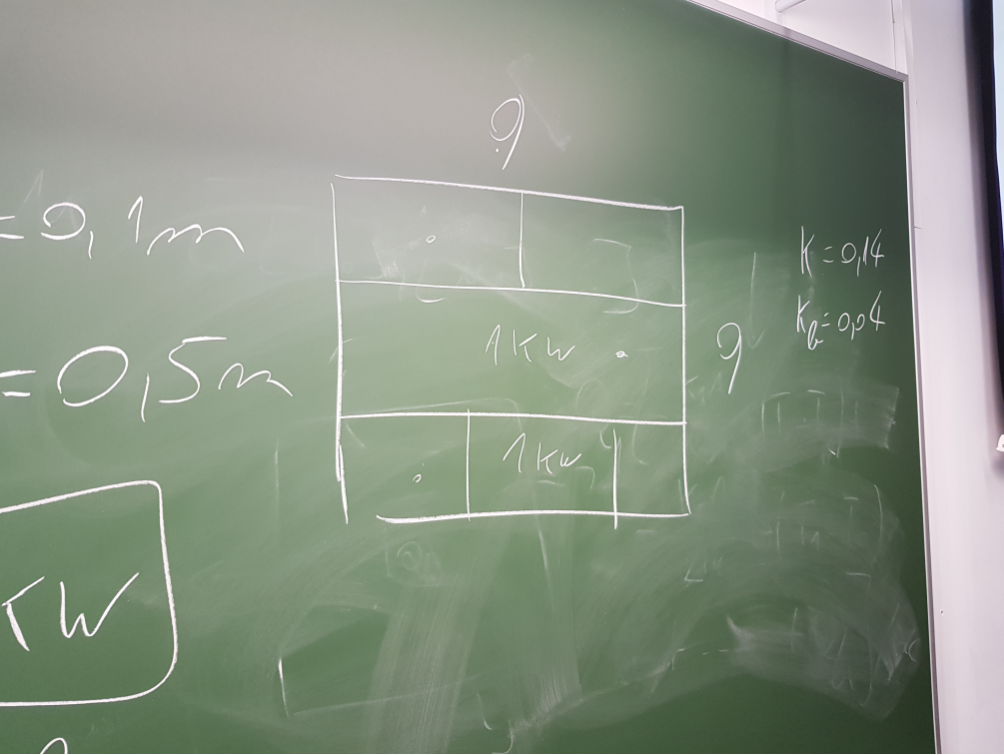